# Базовая модель

## Описание модели

В модели присутствуют два вида агентов – **n** продавцов и **m** покупателей. В модели рассматривается только один вид товара, все продавцы хотят его продать, все покупатели его купить. 

## Продавцы

У каждого продавца **s** определено минимальное значение цены **s.min_price**, за которую он готов продать товар. Ниже этой цены продавцу невыгодно продавать товар. У разных продавцов значение **s.min_price** может быть разным. У каждого продавца значение **s.min_price** определяется в начале процесса моделирование как случайное число, равномерно распределенное на отрезке **[saller_min, saller_max]**. Величины **saller_min** и **saller_max** одинаковы для всех продавцов и являются параметрами модели.

Также у каждого продавца **s** есть значение ожидаемой цены продажи **s.expect_price**, которая всегда больше или равна, чем **s.min_price**. Изначально **s.expect_price** равно **saller_max**, но в дальнейшем может уменьшаться или увеличиваться на величину **saller_delta**, одинаковую для всех продавцов и являющейся параметром модели. Изменение **s.expect_price** происходит после взаимодействия данного продавца **s** с покупателем. Правила данного изменения будут описаны ниже. 


## Покупатели

У каждого покупателя **с** определено максимальное значение цены **c.max_price**, за которую он готов купить товар. Выше этой цены покупателю невыгодно покупать товар. У разных покупателей значение **c.max_price** может быть разным. У каждого покупателя значение **c.min_price** определяется в начале процесса моделирования как случайное число, равномерно распределенное на отрезке **[consumer_min ,consumer_max]**. Величины **consumer_min** и **consumer_max** одинаковы для всех продавцов и являются параметрами модели.
Также у каждого покупателя есть значение ожидаемой цены продажи **c.expect_price**, которая всегда меньше или равна, чем **c.max_price**. Изначально **c.expect_price** равно **0**, но в дальнейшем может уменьшаться или увеличиваться на величину **consumer_delta**, одинаковую для всех покупателей и являющейся параметром модели. Изменение **c.expect_price** происходит после взаимодействия данного покупателя c продавцом. Правила данного изменения будут описаны ниже. 


## Взаимодействие

На каждом шаге моделирования случайным равновероятным образом выбирается один продавец **s** и один покупатель **c**. Между ними происходит попытка заключения сделки. 

Если **s.expect_price** меньше или равно **c.expect_price** покупателя, то: 
1. сделка происходит,
2. **s.expect_price** увеличивается на **s.delta**,
3. **c.expect_price** уменьшается на **c.delta**.
Такое поведение объясняется тем, что текущие ожидания от сделки удовлетворяют ожиданиям как продавца, так и покупателя. Реальная стоимость купли-продажи может быть определена как **(s.expect_price + c.expect_price) / 2**, однако в данной модели эта величина никак не учитывается. 

При этом продавец считает, что если он сейчас продал товар за стоимость как минимум **s.expect_price**, то в дальнейшем он может его продать немного дороже и **s.expect_price** можно немного увеличить.

А покупатель считает, что он купил сейчас товар за стоимость не более **c.expect_price**, то в дальнейшем он может покупать товар немного дешевле и **c.expect_price** можно немного уменьшить.

Если **s.expect_price** больше, чем **c.expect_price** покупателя, то:
1. сделка не происходит,
2. **s.expect_price** уменьшается на **s.delta**,
3. **c.expect_price** увеличивается на **c.delta**.
Такое поведение объясняется тем, что текущие ожидания от сделки не удовлетворяют ожиданиям как продавца, так и покупателя.

При этом продавец считает, что если он сейчас не продал товар за стоимость **s.expect_price**, то для продажи в следующий раз **s.expect_price** надо немного уменьшить.

А покупатель считает, что если он сейчас не смог купить товар за **c.expect_price**, то для покупки в следующий раз **c.expect_price** надо немного увеличить.


## Анализ


Модель на каждом такте должна учитывать:
1. Среднее значение **s.expect_price** по всем продавцам,
2. Минимальное значение **s.expect_price** по всем продавцам,
3. Среднее значение **с.expect_price** по всем покупателям,
4. Максимальное значение **с.expect_price** по всем покупателям,
5. Долю состоявшихся сделок на данный момент.

## Параметры модели


* **n** - количество продавцов, 
* **m** - количество покупателей,
* **[saller_min, saller_max]** – интервал, из которого определяется **s.min_price** для каждого продавца,
* **saller_delta** - величина изменения ожидаемой цены у покупателя,
* **[consumer_min ,consumer_max]** – интервал, из которого определяется **с.max_price** для каждого покупателя,
* **consumer_delta** - величина изменения ожидаемой цены у продавца.


## Технические требования 


* Модель должна быть построена в объектно-ориентированном подходе. Каждый вид агента описывается определенным классом, а каждый агент, соответственно, является объектом данного класса.
* Модель также является классом, в конструктор которого передаются все параметры модели.
* Модель должна иметь метод **run(n)**, который моделирует **n** последующих шагов модели 

## Построение графиков

* Модель должна иметь метод **plot_dynamics(i,j)**, который строит графики анализа поведения моделей на интервале шагов с **i** по **j**.
* Модель должна иметь метод **plot_supply_and_demand(i)**, который строит графики спроса и предложения в момент времени **i**.

## Построение графа (схемы)


Модель должна иметь метод **plot_graph(i, j)**, который строит и визуализирует граф, в котором вершинами являются продавцы и покупатели, а ребра обозначают количество совершенных или не совершенных между ними сделок в периоде с **i** по **j**. Покупатели обозначены синим цветом, продавцы обозначены пурпурным. Зеленые ребра обозначают удачные сделки между продавцом и покупателем. Красные ребра обозначают неудачные сделки. Толщина ребра показывает количество сделок между данными продавцом и покупателем относительно общего количества сделок.

# Реализация базовой модели

## Подключение библиотек

In [3]:
import random
import matplotlib.pyplot as plt
from tqdm import trange # Модуль для визуализации прогресс-бара при запуске модели
import graphviz # Модуль для визуализации графов

## Реализация базовой модели

In [4]:
def mean(lst): # среднее значение
    return sum(lst)/len(lst)


class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов

        '''
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers

        # Список всех продавцов модели
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]
        
        # Список всех покупателей модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список результатов сделок. На позиции i находится словарь вида
        # { 
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''
        
        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
        
        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])
        
        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась
            
            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()
            
        else:
            # Сделка не состоялась
            
            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            # Данный покупатель решает увеличить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()
            
            # Данный продавец решает уменьшить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()
            

    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара
            
            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)
            
            # Выбираем индекс продавца случайным образом
            seller_id = random.randrange(0, self.num_of_sellers)
            
            # Моделируем сделку
            self.deal(consumer_id, seller_id)
            

    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)
        
        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")
        
        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")
        
        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")
        
        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''
        
        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию. 
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")
            
            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию. 
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")
            
            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок 
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок 
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end    
        for i in range(start, end+1):
            
            
            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')
        
        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta



## Запуск модели

In [32]:
random.seed(42)
model = Model(num_of_consumers=100,
              num_of_sellers=100,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1)
model.run(1000) # 1000 - number of steps

100%|███████████████████████████████████████████████████████████████████████████| 1001/1001 [00:00<00:00, 33745.10it/s]


## Визуализация модели

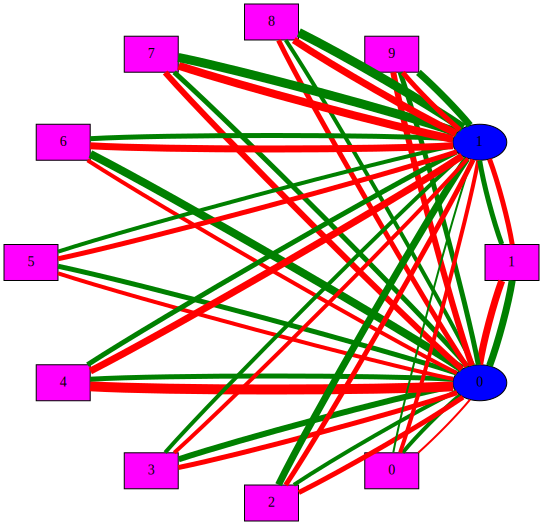

In [21]:
model.plot_graph(100,500) # (start, end)

## Результаты моделирования

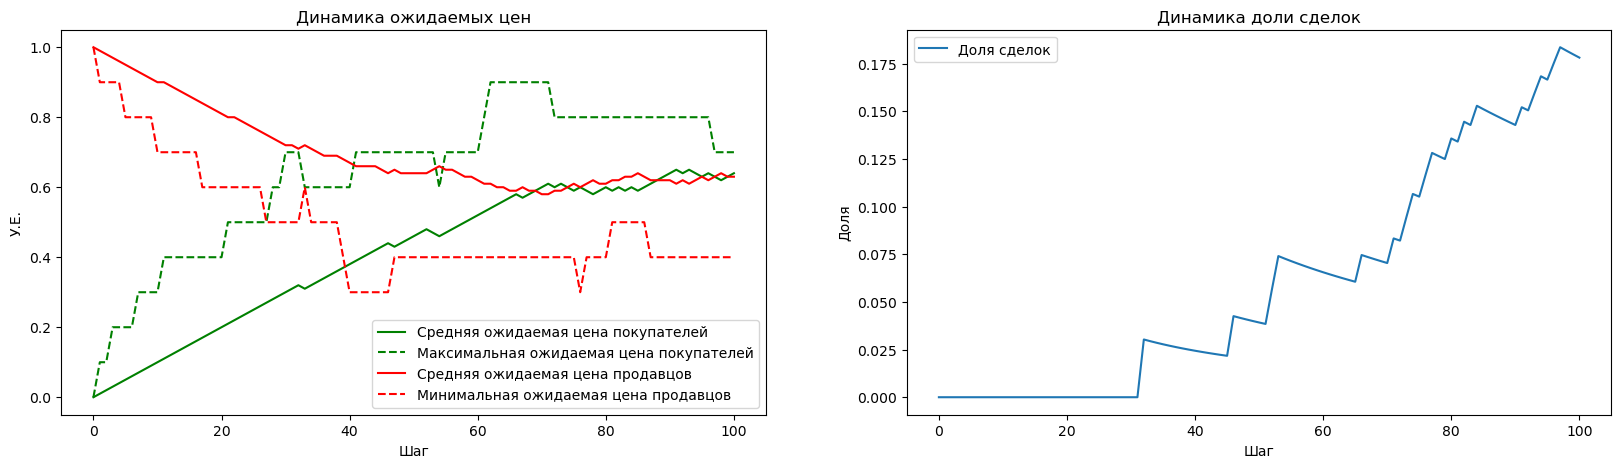

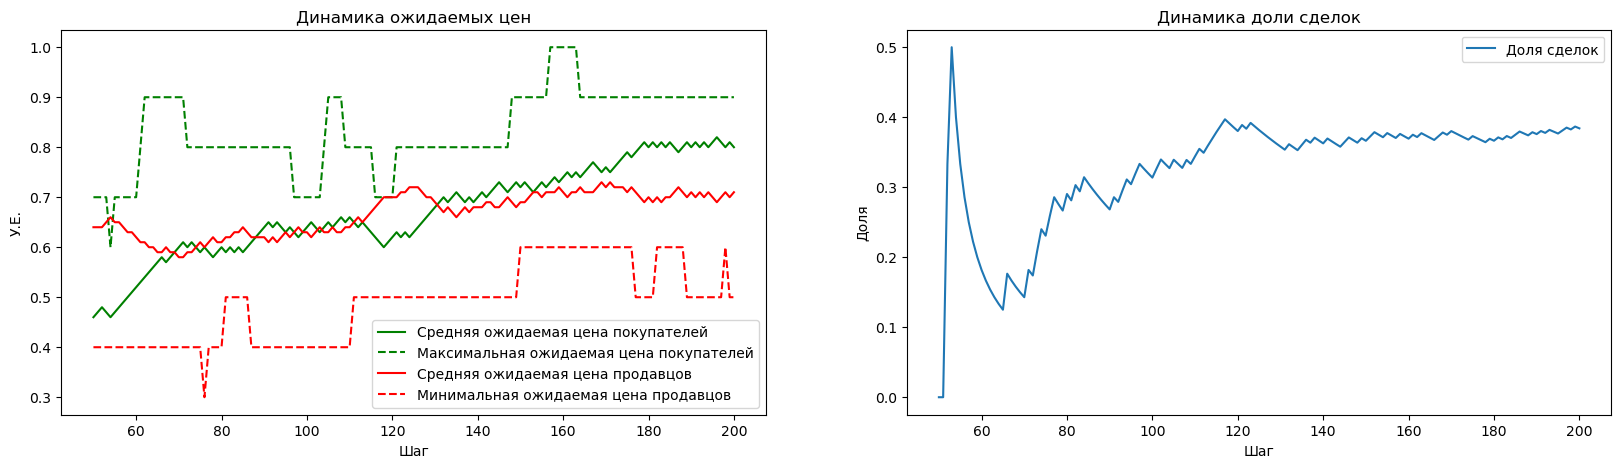

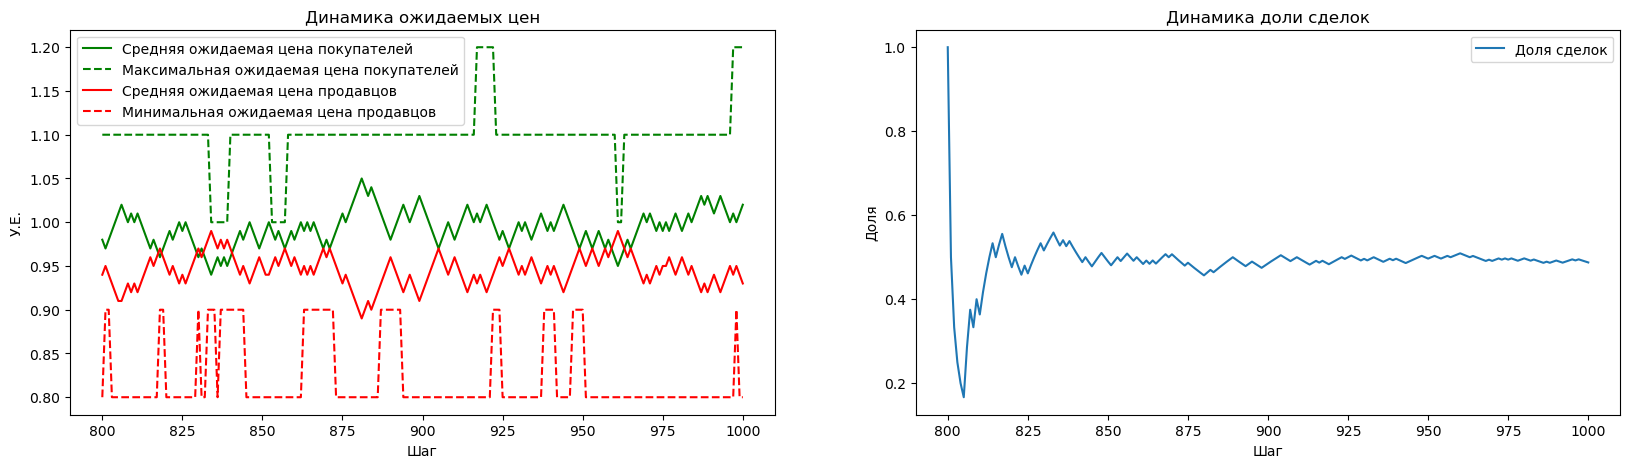

In [11]:
model.plot_dynamics(0, 100) #(start_period, end_period)
model.plot_dynamics(50, 200)
model.plot_dynamics(800, 1000)

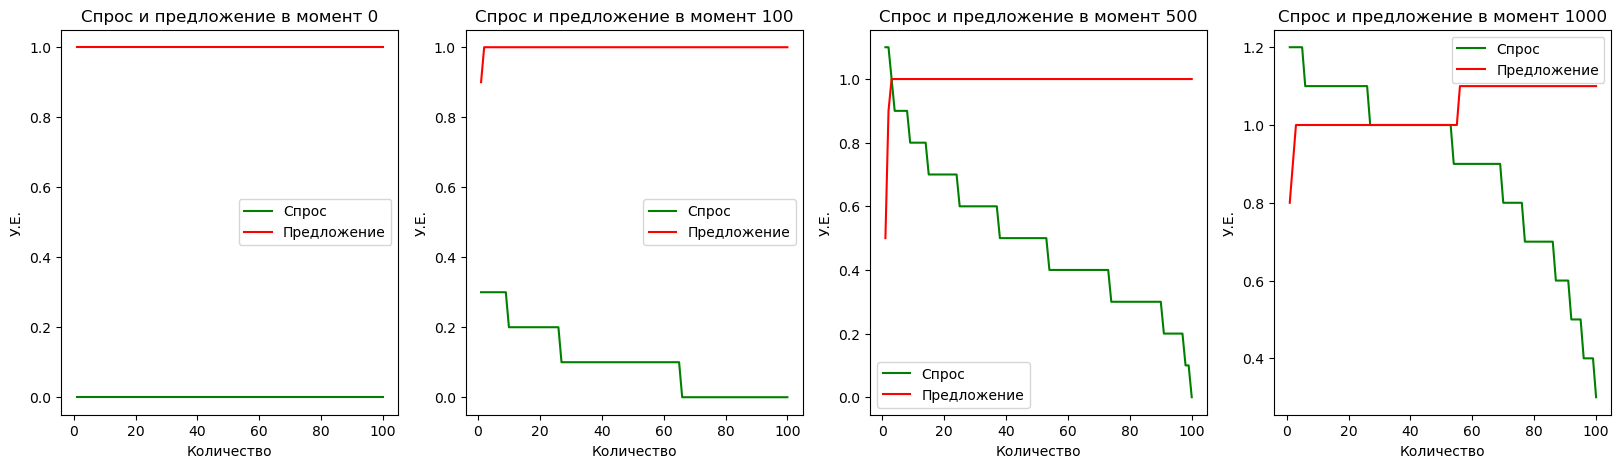

In [33]:
model.plot_supply_and_demand([0, 100, 500, 1000]) #(в листе указаны моменты времени)

# Задания

При выполнения всех заданий Вам необходимо писать текст (в Markdown ячейках), вызывать существующие фрагменты кода и писать собственный код. При реализации кода придерживайтесь объектно-ориентированного подхода. Обращаем Ваше внимание, что в данных заданиях будет в первую очередь будет оцениваться Ваши интерпретации и выводы относительно свойств и поведения моделей.   

## Задание 1 (1 балл)

Запустите базовую модель с разными параметрами. Проанализируйте, как меняется поведение модели в зависимости от изменения параметров. Опишите эти изменения.

Проинтерпретируйте (дайте объяснение) результаты работы базовой модели. В частности, обратите внимание на следующие аспекты:
* Ожидаемые цены попадают в некоторый интервал.
* Доля сделок выходит на некоторый постоянный уровень. 
* Скорости сходимости зависят от количества продавцов и покупателей и шага цены.
* Опишите характеристики изменений диаграмм связей со временем.

Рассмотрим одинаковое количество продавцов и покупателей. При первых итерациях модели видно, что ожидаемые цены продавцов заметно выше, чем у покупателей. Со временем средние ожидаемые цены продавцов начинают опускаться, а цены покупателей, наоборот, подниматься. Эти цены остаются близкими друг к другу и медленно растут до определенного значения, т.к. у нас есть максимальные допустимые цены для покупателей.

Запустим модель с одинаковым количеством продавцов и покупателей, равному 5, 10, 30 и 80, и сравним динамику показателей. Можем заметить, что для небольшого числа покупателей и продавцов (в случае 5 и 10) средние цены сходятся очень быстро, и остаются в районе 0.9 для текущих параметров модели. При увеличении числа продавцов и покупателей сходимость заметно замедляется. При этом при увеличении числа участников рынка она становится заметнее более плавной, и разброс средних значений в динамике сильно уменьшается.

При первых итерациях модели при текущих параметрах доля сделок находится на нуле. С определенного момента доля сделок начинает быстро увеличиваться, т.к. средние ожидаемые цены начинают подстраиваться. Со временем рост замедляется и выходит на постоянный уровень. 

Если взять очень маленький шаг цен, то сходимость средних цен будет заметно медленнее, но при этом плавнее. С увеличением шага увеличивается скорость сходимости, но так же и разброс средних цен в динамике.

Заметим, что при привышении числа продавцов над покупателями динамика показателей не меняется.

## Задание 2 (2 балла)


Модифицируйте базовую модель одним из указанных ниже вариантов.

<b><font color="red">!</font> Номер Вашего варианта указан в <a href="https://docs.google.com/spreadsheets/d/1jWBLQ1bJG2t2Ci38r1xFrKP06VjFn-IyKQO4PIEvXTA/edit#gid=0">таблице</a>.</b>

1. Разные вероятности выбора разных продавцов и покупателей.
2. Генерация разных групп покупателей и продавцов.
3. Разные переговорные позиции продавцов и покупателей (в том числе случайные).
4. Ожидания покупателей и продавцов меняются только в сторону средней цены предыдущего периода.
5. К граничным ценам продавцов и покупателей каждый период добавляется случайная величина.

* Продемонстрируйте и опишите работу модифицированной модели.
* Проинтерпретируйте результаты работы модели.

 К максимальной цене покупателя и минимальной цене продавца прибавим случайную величину. Каждый новый период эти значения будут генерироваться заново.

 Изменения затронут только классы Consumer и Seller, другие функции модели будут работать по тому же принципу, что и раньше.

In [21]:
class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        
        #Прибавление к граничным ценам покупателей случайной величины
        
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min) + random.randrange(0, 18)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        
        #Прибавление к граничным ценам продавцов случайной величины
        
        self.min_price = seller_min + random.random()*(seller_max - seller_min) + random.randrange(0, 18)
        self.expect_price = seller_max
        self.delta = seller_delta
        
    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta


In [22]:
random.seed(42)
model = Model(num_of_consumers=100,
              num_of_sellers=10,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1)
model.run(1000)

100%|██████████████████████████████████████████████████████████████████████████| 1001/1001 [00:00<00:00, 138395.30it/s]


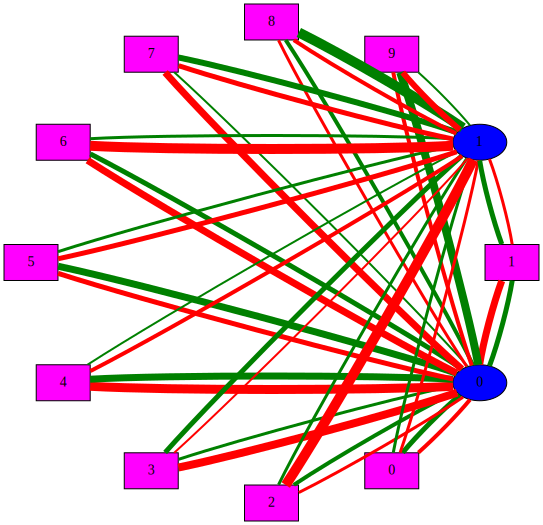

In [16]:
model.plot_graph(100, 300)

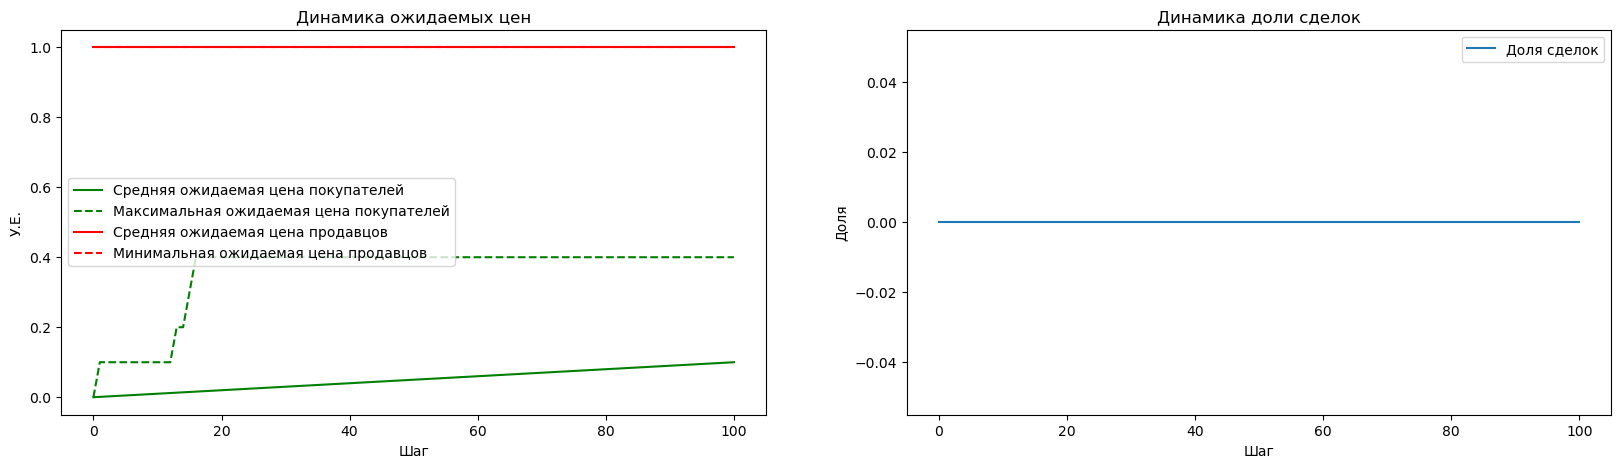

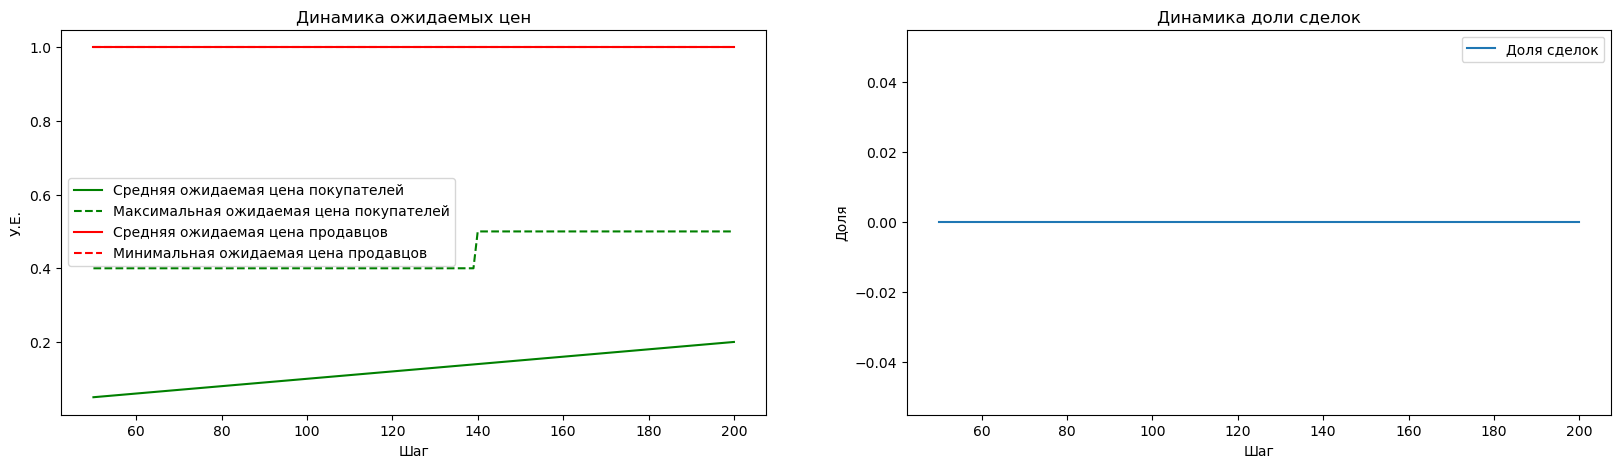

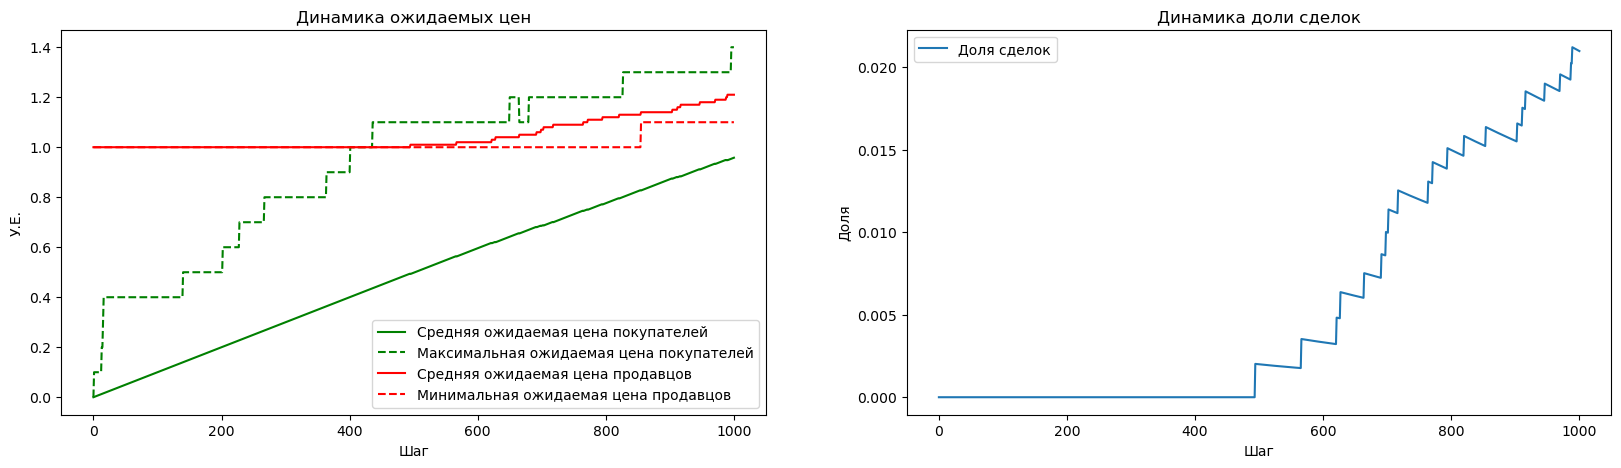

In [23]:
model.plot_dynamics(0, 100) #(start_period, end_period)
model.plot_dynamics(50, 200)
model.plot_dynamics(0, 1000)

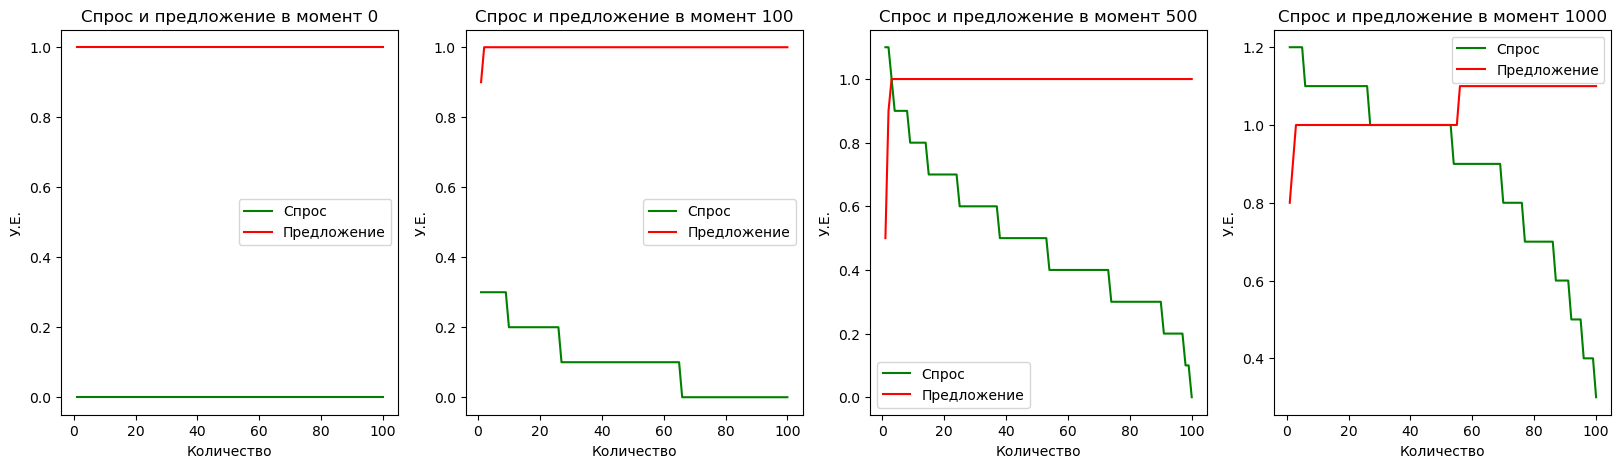

In [31]:
model.plot_supply_and_demand([0, 100, 500, 1000]) #(в листе указаны моменты времени)

 При прочих равных условиях ожидаемая цена на рынке увеличилась при рассмотрении любого периода. Это напрямую следует из увеличения граничных цен продавцов и покупателей на положительную величину. При этом стоит отметить, что цена не устанавливается на определенном уровне, а продолжает колебаться с увеличением периода.

 При анализе нескольких случаев можно было сделать вывод о том, что доля сделок в среднем стала ниже. Однако, при анализе большой выборки, подобный вывод не будет истинным. При увеличении граничных цен на случайную величину максимальная цена покупателя и минимальная цена продавца могли стать как дальше друг от друга - в этом случае количество удачных сделок скорее действительно снизится. Так и оказаться на более близком расстоянии - в этом случае доля состоявшихся сделок с большей вероятностью вырастет. 
 
 Однако, стоит отметить, что доля сделок постепенно стабилизуирется с увеличением номера периода.
 
 Графики спроса и предложения в различные моменты времени сдвигаются на сгенерированную случайную величину.
 Заметим, что в реальной жизни подобное изменение нашей модели равносильно введению потоварных налогов на производителя и потребителя. Такая мера в реальной жизни (введение потоварного налога) используется для финансирования государственного бюджета и уменьшения отрицательных внешних эффектов (в экономической теории это называется налог Пигу).

## Задание 3 (3 балла)

Предположим, что теперь мы рассматриваем последовательные дни, и контакты продавцов и покупателей происходят в течение дня. Количество контактов между продавцами и покупателями в день ограничено константой max_connections, и не меняется в процессе моделирования.

Выделим локальные (внутридневные) параметры, которые меняются и учитываются в течение одного дня. Но на следующий день сбрасываются до исходных значений. 

Модифицируйте базовую модель одним из указанных ниже вариантов.

<b><font color="red">!</font> Номер Вашего варианта указан в <a href="https://docs.google.com/spreadsheets/d/1jWBLQ1bJG2t2Ci38r1xFrKP06VjFn-IyKQO4PIEvXTA/edit#gid=0">таблице</a>.</b>

1. Локальные параметры: количество сделок агента. Не может быть более одной сделки.
2. Локальные параметры: у каждого продавца свое фиксированное количество товара, которое он может продать в один день. В конце для излишки сгорают.
3. Локальные параметры: у каждого покупателя свое фиксированное количество товара, которое он может купить в один день. 
4. Локальные параметры: у каждого продавца случайное количество товара, которое он может продать в один день. В конце для излишки сгорают.
5. Локальные параметры: у каждого покупателя случайное количество товара, которое он может купить в один день.

* Продемонстрируйте и опишите работу модифицированной модели.
* Проинтерпретируйте результаты работы модели.

Введем новые переменные:
 - max_connections в поле класса Model_3 (этот параметр мы задаем сами)
 - max_quantity в поле класса Seller (определяется рандомно)
 \
 \
 В новых условиях сделка может не состояться по двум причинам:
 \
 \
 1) Продавец и покупатель не смогли договориться из-за разных ожидаемых цен (seller.expect_price>consumer.expect_price) - пусть результат такого рода взаимодействия записывается нулем в массиве deals_results
 
 2) Продавец не смог продать товар из-за того, что уже продал максимальное количество товара за текущий день - пусть результат такого рода взаимодействия записывается цифрой 2 в массиве deals_results
 (Удачная сделка по-прежнему записывается единицей.)
 
 Теперь каждый день совершается max_connections сделок, а функция run(n) запускает модель от n-го дня

In [65]:
class Model_3:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta, max_connections):

        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers
        self.max_connections = max_connections

        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]

        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]

        self.consumers_expect_price = []

        self.sellers_expect_price = []

        self.deals_results = []


    def deal(self, consumer_id, seller_id):
        
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
        
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])
        if self.sellers[seller_id].max_quantity>0:
        
            if (self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price): # Сделка состоялась

                self.sellers[seller_id].max_quantity-=1 # уменьшаем количество, которое продавец еще может продать

                self.deals_results.append({
                    'consumer_id' : consumer_id,
                    'seller_id' : seller_id,
                    'result' : 1
                    })

                self.consumers[consumer_id].decrease_expect_price()
                self.sellers[seller_id].increase_expect_price() 

            else: # Сделка не состоялась из-за того, что продавец и покупатель не смогли договориться

                self.deals_results.append({
                    'consumer_id' : consumer_id,
                    'seller_id' : seller_id,
                    'result' : 0
                    })

                self.consumers[consumer_id].increase_expect_price()

                self.sellers[seller_id].decrease_expect_price()
                
        else: # Сделка не состоялась из-за невозможности у продавца продать данный товар (превышениие параметра max_quantity)

            self.deals_results.append({
                    'consumer_id' : consumer_id,
                    'seller_id' : seller_id,
                    'result' : 2
                    })
            

    def run(self, num_of_steps):

        for _ in trange(num_of_steps+1):
            
            [x.get_max_quantity() for x in self.sellers]
            
            for i in range(0, self.max_connections):
            
                consumer_id = random.randrange(0, self.num_of_consumers)
            
                seller_id = random.randrange(0, self.num_of_sellers) 
            
                self.deal(consumer_id, seller_id)
            

    def plot_dynamics(self, start, end):

        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)

        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")

        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")

        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")

        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")

        deals_sum = [0]
        for i in range(start, end+1):
            if self.deals_results[i]['result'] == 2:
                deals_sum.append(deals_sum[-1])
            else:
                deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):

        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):

            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")

            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")
            
            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):

        g_deals = {}

        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }
  
        for i in range(start, end+1):
            
            if self.deals_results[i]['result'] == 0:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            elif self.deals_results[i]['result'] == 1:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1
            else:
                pass
                
        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')
        
        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta
        self.max_quantity = random.randrange(0,30)
        
    def get_max_quantity(self):
        self.max_quantity = random.randrange(0,30)            

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta



In [66]:
random.seed(42)
N = 5
model = Model_3(num_of_consumers=5,
              num_of_sellers=50,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1,
              max_connections = 650)
model.run(N)

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 134.75it/s]


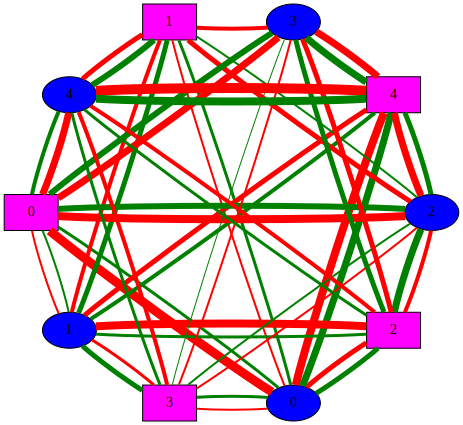

In [38]:
model.plot_graph(10, 1000)

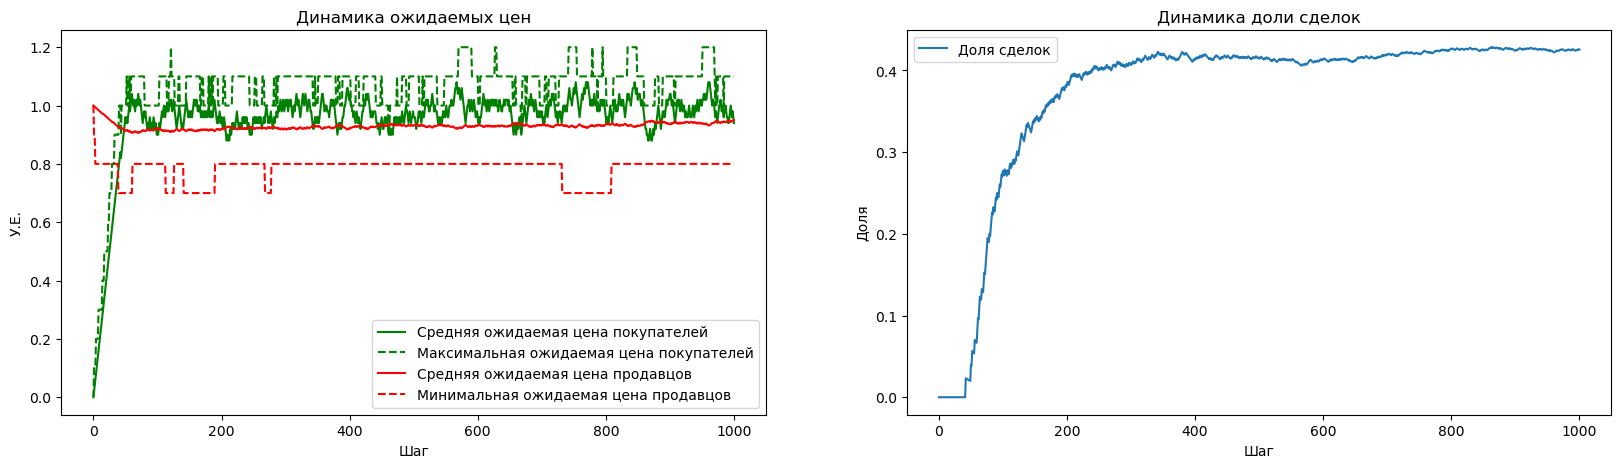

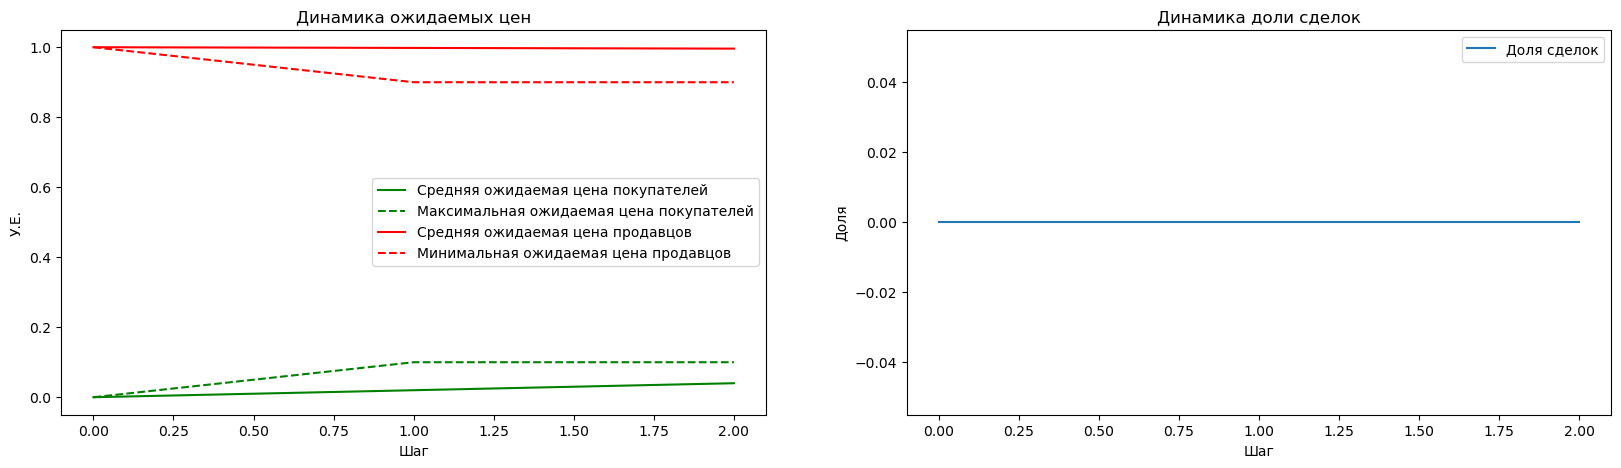

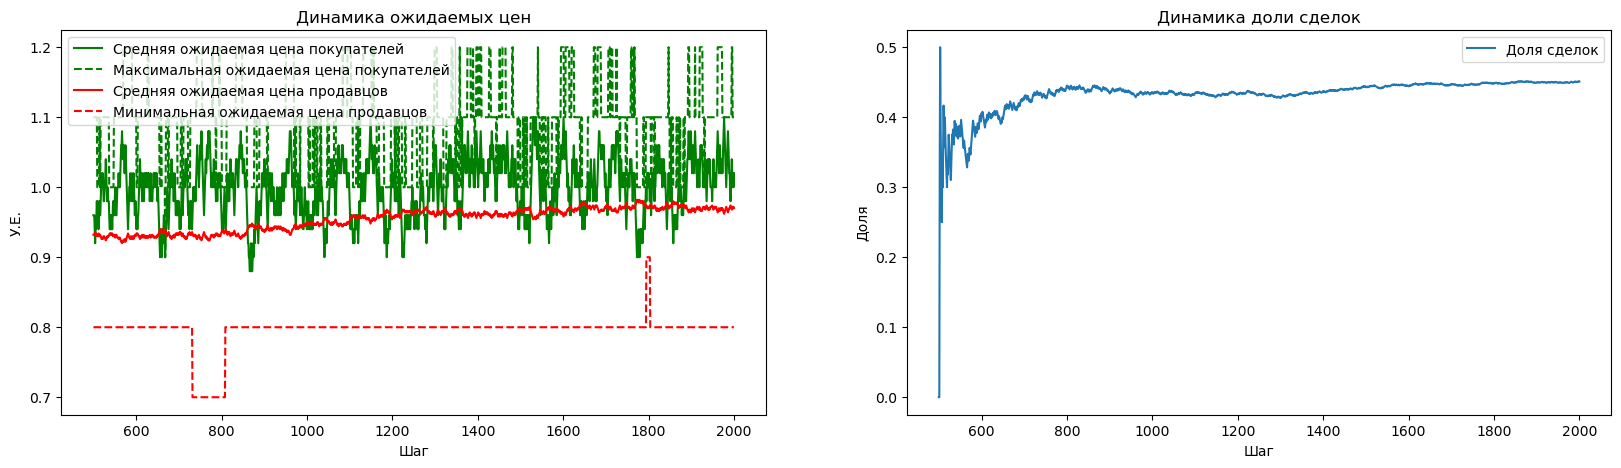

In [67]:
model.plot_dynamics(0, 1000) #(start_period, end_period)
model.plot_dynamics(0, 2)
model.plot_dynamics(500, 2000)

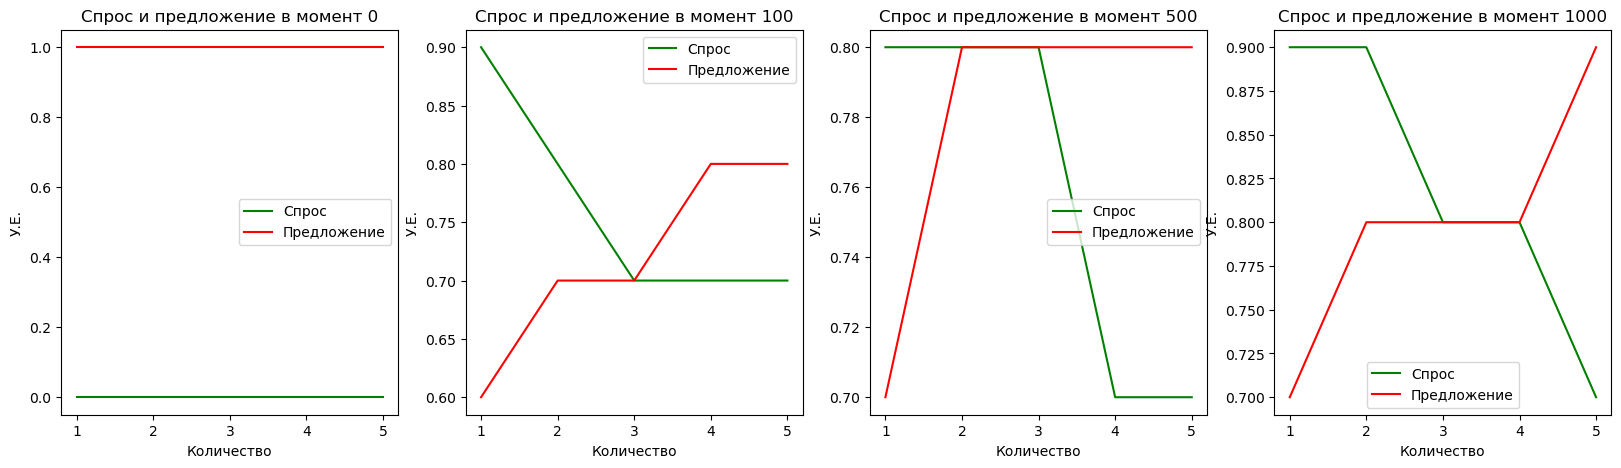

In [29]:
model.plot_supply_and_demand([0, 100, 500, 1000]) #(в листе указаны моменты времени)

 В среднем доля удачных сделок упала по сравнению со 2 заданием, при этом динамика роста сделок также немного поменялась: доля сделок по-прженему растет с увеличением периода, но теперь не так быстро как раньше. Также на графике появилось большее количество крупных колебаний. Подобные изменения связаны с появлением ограничений на продаваемое количество для каждого производителя. Даже если производитель готов продать большее количество, ограничение из вне может не позволить ему это сделать, что выливается в описанных выше изменениях графика.
 
   При существенном превышении числа продавцов над количеством покупателей и в случае равенства величин seller.delta и consumer.delta средняя ожидаемая цена продавцов находится на относительно стабильном уровне, в то время как средняя ожидаемая цена покупателей сильно колеблется около этой величины. При существенном превышении числа покупателей над количеством продавцов средняя ожидаемая цена покупателей постоянно возрастает, в то время как та же величина для продавцов колеблется и "подстравиается" под цену покупателей.
   В случае, если количество агентов на рынке примерно одинаково между собой, оба графика начинают активно колебаться, пересекая друг друга.

Данная модель приближена к реальной жизни существенно больше, чем базовая: она может отражать ситуацию введения индивидуальной квоты на производителя со стороны государства, или же наличия запаса на складе, которое производитель может продать за один день.


## Задание 4 (4 балла)


Придумайте свою модификацию модели, в которой отражены другие черты реальных рынков.

<b><font color="red">!</font> Перед выполнением задания необходимо <a href="https://docs.google.com/forms/d/e/1FAIpQLSdYmodGU144W_1L45tfIGmGpK9_0yRlVp7XeSG4yKfUGCkMTg/viewform">согласовать</a> Вашу идею с преподавателем. Ваше предложение не должно совпадать с предыдущими модификациями или модификациями других студентов.
Все согласованные предложения от студентов будут отображаться в <a href="https://docs.google.com/spreadsheets/d/1enXCHHBGYJA1iAUvuDj7TYCyBIHjX3rtZ5D4FIXnbZ8/edit?usp=sharing">таблице</a>.</b>

* Продемонстрируйте и опишите работу модифицированной модели.
* По возможности сделайте ее визуализацию.
* Проинтерпретируйте результаты работы модели.

 Введем в третью модель ещё одного игрока: биржу, которая берет комиссию за каждую совершенную сделку. При этом биржа динамически меняет размер комиссии в зависимости от деловой активности предыдущего дня.

 Помимо других параметров модель_4 принимает на вход значения initial_fee и delta_fee - изначальный размер комиссии, а также изменение комиссии на каждом шаге. Если доля удачных сделок в предыдущий день находилась в интервале:
 - от 0 до 0.1: размер комиссии на текущий день будет равен initial_fee
 - от 0.1 до 0.3: размер комиссии на текущий день будет равен initial_fee+delta_fee
 - от 0.3 до 0.5: размер комиссии на текущий день будет равен initial_fee+1.5*delta_fee
 - от 0.5 до 0.75: размер комиссии на текущий день будет равен initial_fee+2*delta_fee
 - от 0.75 до 1: размер комиссии на текущий день будет равен initial_fee+3*delta_fee
 
Остальные обозначения взяты из предыдущего пункта.
Сделка совершится если seller.expect_price + current_fee <= consumer.expect_price

  Также будем вести историю получаемой биржей прибыли за каждый день, и визуализируем её с помощью графика в конце задания.

In [59]:
class Model_4:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta, max_connections, initial_fee, delta_fee):

        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers
        self.max_connections = max_connections
        
        # Вводим новые параметры в модель:
        self.initial_fee = initial_fee
        self.delta_fee = delta_fee
        self.exchange = Exchange(initial_fee, delta_fee)

        
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]
        
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]
        
        self.consumers_expect_price = []
        
        self.sellers_expect_price = []

        self.deals_results = []


    def deal(self, consumer_id, seller_id,day):
        
        fee = self.exchange.current_fee
        
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
        
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])

        if self.sellers[seller_id].max_quantity>0:
        
            if (self.sellers[seller_id].expect_price + fee <= self.consumers[consumer_id].expect_price): # Сделка состоялась

                self.sellers[seller_id].max_quantity-=1 # уменьшаем количество, которое продавец еще может продать

                self.deals_results.append({
                    'day' : day,
                    'consumer_id' : consumer_id,
                    'seller_id' : seller_id,
                    'result' : 1
                    })

                self.consumers[consumer_id].decrease_expect_price()

                self.sellers[seller_id].increase_expect_price()

            else: # Сделка не состоялась из-за того, что продавец и покупатель не смогли договориться

                self.deals_results.append({
                    'day' : day,
                    'consumer_id' : consumer_id,
                    'seller_id' : seller_id,
                    'result' : 0
                    })

                self.consumers[consumer_id].increase_expect_price() 

                self.sellers[seller_id].decrease_expect_price() 
        
        else: # Сделка не состоялась из-за невозможности у продавца продать данный товар (превышениие параметра max_quantity)

            self.deals_results.append({
                    'day' : day,
                    'consumer_id' : consumer_id,
                    'seller_id' : seller_id,
                    'result' : 2
                    })
            

    def run(self, num_of_steps):

        for d in trange(num_of_steps+1):
            
            [x.get_max_quantity() for x in self.sellers]
            
            self.exchange.update_current_fee(d)
            
            for i in range(0, self.max_connections):
            
                consumer_id = random.randrange(0, self.num_of_consumers) 
            
                seller_id = random.randrange(0, self.num_of_sellers) 
            
                self.deal(consumer_id, seller_id,d)
            
            self.exchange.count_profit(d)
            

    def plot_dynamics(self, start, end):

        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)
        
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")

        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")

        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")

        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")

        deals_sum = [0]
        for i in range(start, end+1):
            if self.deals_results[i]['result'] == 2:
                deals_sum.append(deals_sum[-1])
            else:
                deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]

        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):

        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")

            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")
            
            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        g_deals = {}

        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        for i in range(start, end+1):
            
            if self.deals_results[i]['result'] == 0:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
                
            elif self.deals_results[i]['result'] == 1:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1
                
            else:
                pass
                
        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')
        
        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


In [60]:
class Exchange: # класс агента "Биржа"
    def __init__(self, initial_fee, delta_fee): #
        self.initial_fee = initial_fee
        self.delta_fee = delta_fee
        self.current_fee = initial_fee
        self.profit_history = []
    
    def count_profit(self, day):
        self.profit_history.append(self.current_fee*self.count_successful_deals(day))
        
    def count_successful_deals(self,day):
        positive_count = 0
        for i in range(len(model.deals_results)):
            if (model.deals_results[i]['day'] == day) & (model.deals_results[i]['result'] == 1):
                positive_count += 1
        return positive_count
    
    def count_deals_share(self, day):
        total = 0
        for i in range(len(model.deals_results)):
            if (model.deals_results[i]['day'] == day) & (model.deals_results[i]['result'] != 2):
                total+=1
        if total==0:
            return 0
        else:
            return self.count_successful_deals(day)/total
    
    def update_current_fee(self, day):
        
        if self.count_deals_share(day-1)<=0.1 or day == 0:
            self.current_fee = self.initial_fee
            
        elif 0.1<self.count_deals_share(day-1)<=0.3:
            self.current_fee = self.initial_fee+self.delta_fee
            
        elif 0.3<self.count_deals_share(day-1)<=0.5:
            self.current_fee = self.initial_fee+1.5*self.delta_fee
            
        elif 0.5<self.count_deals_share(day-1)<=0.75:
            self.current_fee = self.initial_fee+2*self.delta_fee
            
        else:
            self.current_fee = self.initial_fee+3*self.delta_fee

class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta
        self.max_quantity = random.randrange(0,30)
        
    def get_max_quantity(self):
        self.max_quantity = random.randrange(0,30)            

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta


In [83]:
random.seed(42)
N = 50
model = Model_4(num_of_consumers=10,
              num_of_sellers=10,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1,
              max_connections = 650,
              initial_fee = 0.4, 
              delta_fee = 0.01)
model.run(N)

100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:01<00:00, 30.67it/s]


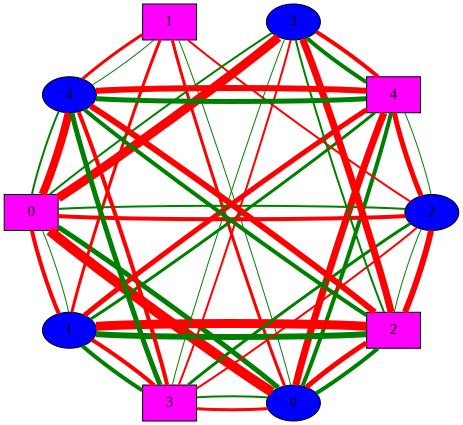

In [59]:
model.plot_graph(3, 500)

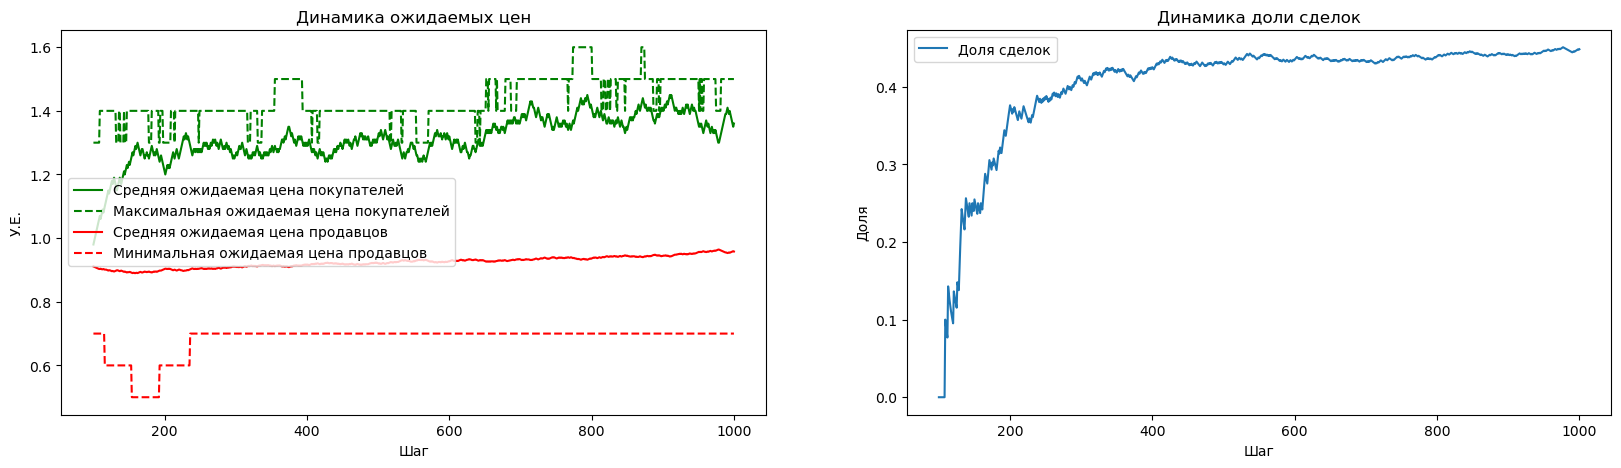

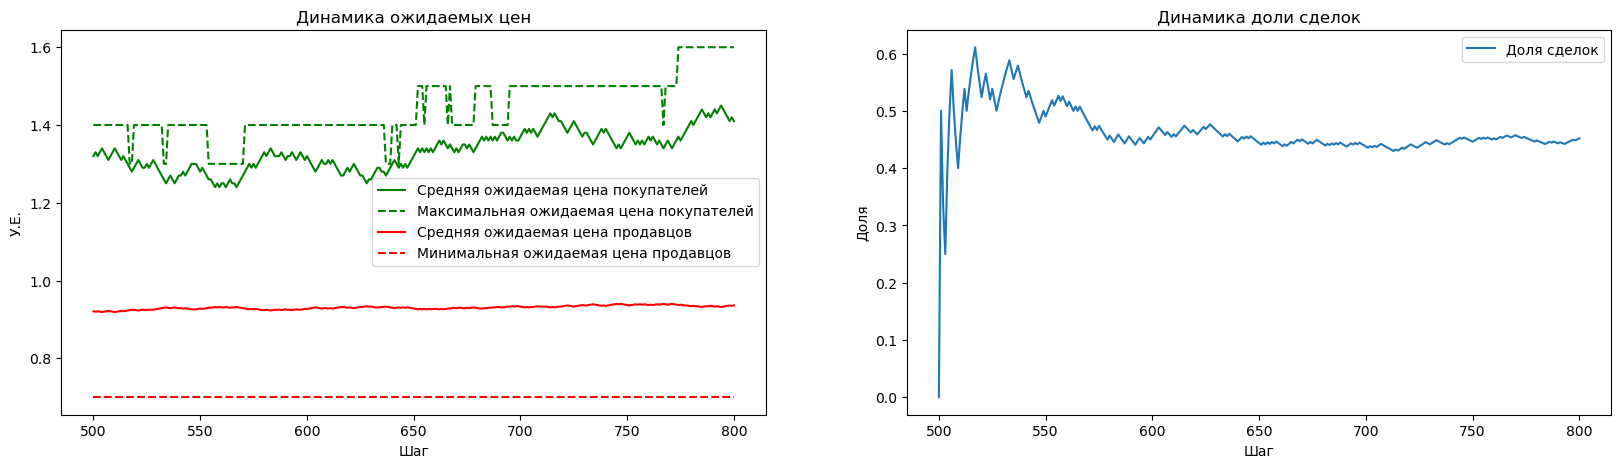

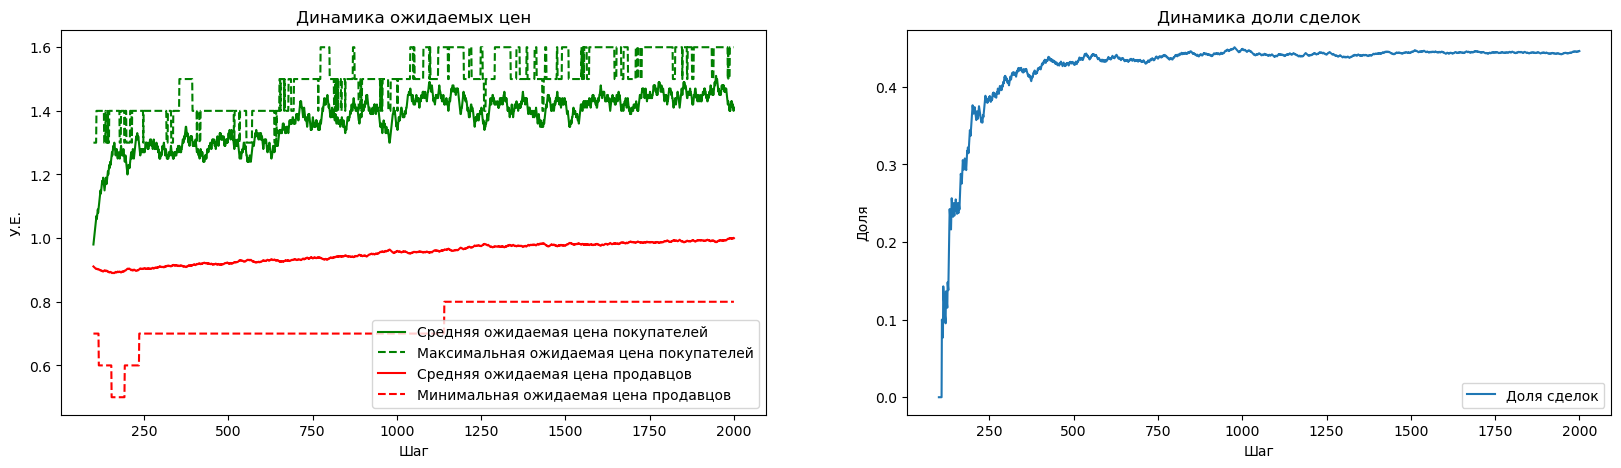

In [77]:
model.plot_dynamics(100, 1000) #(start_period, end_period)
model.plot_dynamics(500, 800)
model.plot_dynamics(100, 2000)

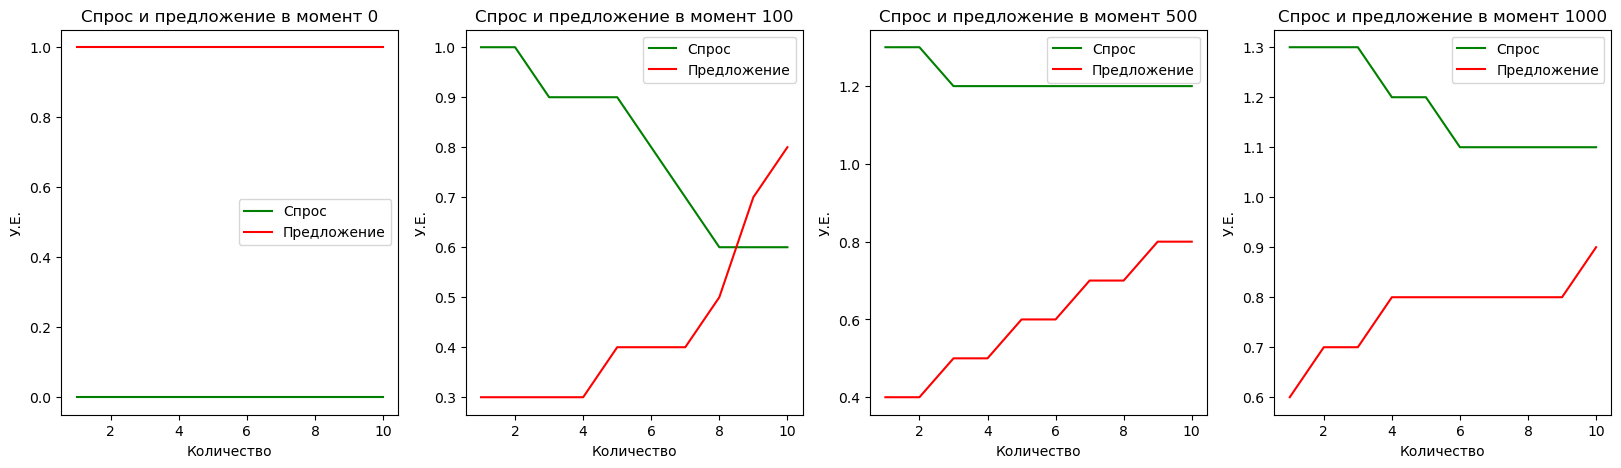

In [84]:
model.plot_supply_and_demand([0, 100, 500, 1000]) #(в листе указаны моменты времени)

 Анализируя динамику ожидаемых цен и доли сделок можно заметить некоторые отличия от третьей модели.
 
 При существенном превышении числа продавцов над количеством покупателей и в случае равенства величин seller.delta и consumer.delta, средняя ожидаемая цена продавцов находится на относительно стабильном уровне, в то время как средняя ожидаемая цена покупателей сильно колеблется существенно выше этой величины. При этом доля сделок в данном случае стабилизируется на определенном уровне.
 
 При существенном превышении числа покупателей над количеством продавцов средняя ожидаемая цена покупателей постоянно возрастает, в то время как та же величина для продавцов колеблется примерно на одном уровне, но в отличие от прошлой модели практически не "подстравиается" под цену покупателей. 
 
 В случае, если количество агентов на рынке примерно одинаково между собой (особенно хорошо это наблюдается при большом количестве агентов), оба графика быстро сближаются и пересекают друг друга без значительных колебаний, в то время как динамика доли сделок имеет положительный тренд.

Ниже реализуем график прибыли биржы:

Видно, что прибыль колеблется в определенном интервале, но не сходится ни к какому из значений.

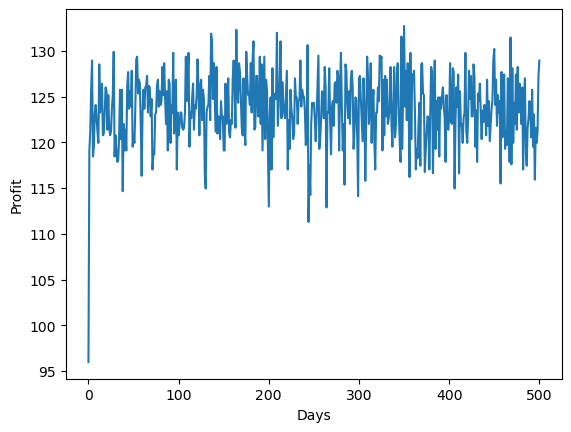

In [82]:
plt.plot(list(range(len(model.exchange.profit_history))), model.exchange.profit_history)
plt.xlabel("Days")
plt.ylabel("Profit");